<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Unit_4_predict_ad_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Use fake advertising data set and predict whether or not someone will click on the ad. 

## 1. Set up

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.shape

(1000, 10)

## 2. Missing data 

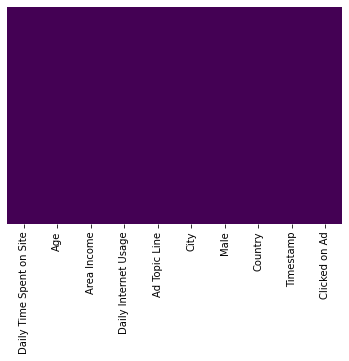

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

I don't see any yellow lines on the plot. That means there is no missing values in the data set. Check again with the following code.

In [7]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## 3. Exploratory data analysis


How many people clicked on add? what is the proportion?

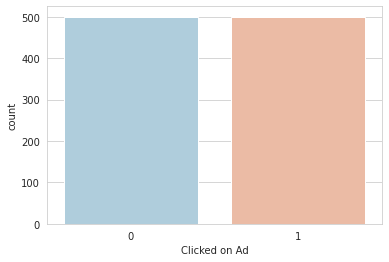

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', data=df, palette='RdBu_r')

There are 500 people clicked on ad, and 500 people did not click on ad.

How did gender play a role in clicking ads?

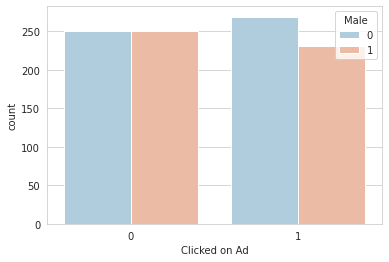

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue = 'Male',data=df, palette='RdBu_r')

There are more female clicking on ads than male.

How did daily internet usage play a role in clicking ads?

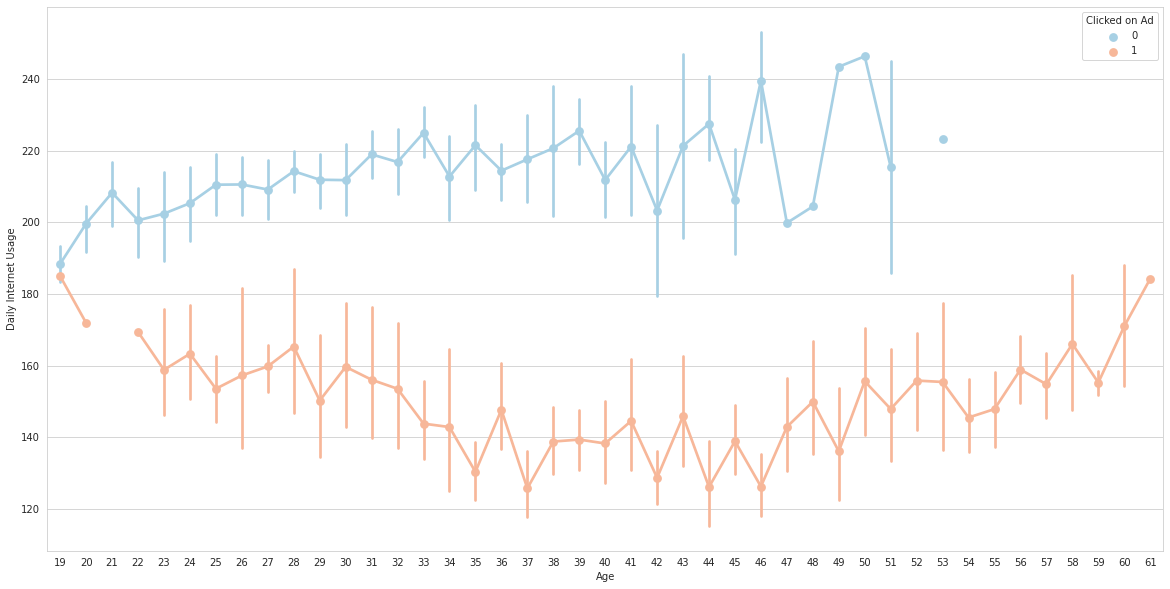

In [27]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Age', y = 'Daily Internet Usage', hue = 'Clicked on Ad',data=df, palette='RdBu_r')

By looking at the graph above, we see that age seems to be unrelated to clicking ads. On the other hand, we observed that the longer someone uses internet, the less likely that he/she would click on ads.  

How did daily time spend on site play a role in clicking ads?

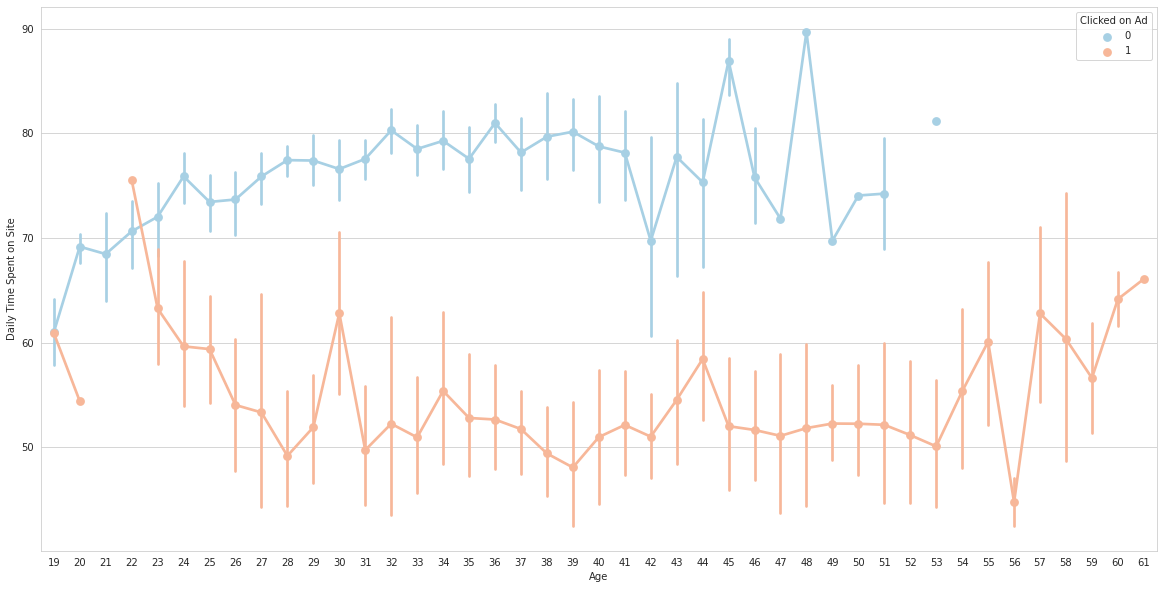

In [29]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Age', y = 'Daily Time Spent on Site', hue = 'Clicked on Ad',data=df, palette='RdBu_r')

We see similar graph as daily usage internet, that is the longer someone spend on site, the less likely he/she would click on ads. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


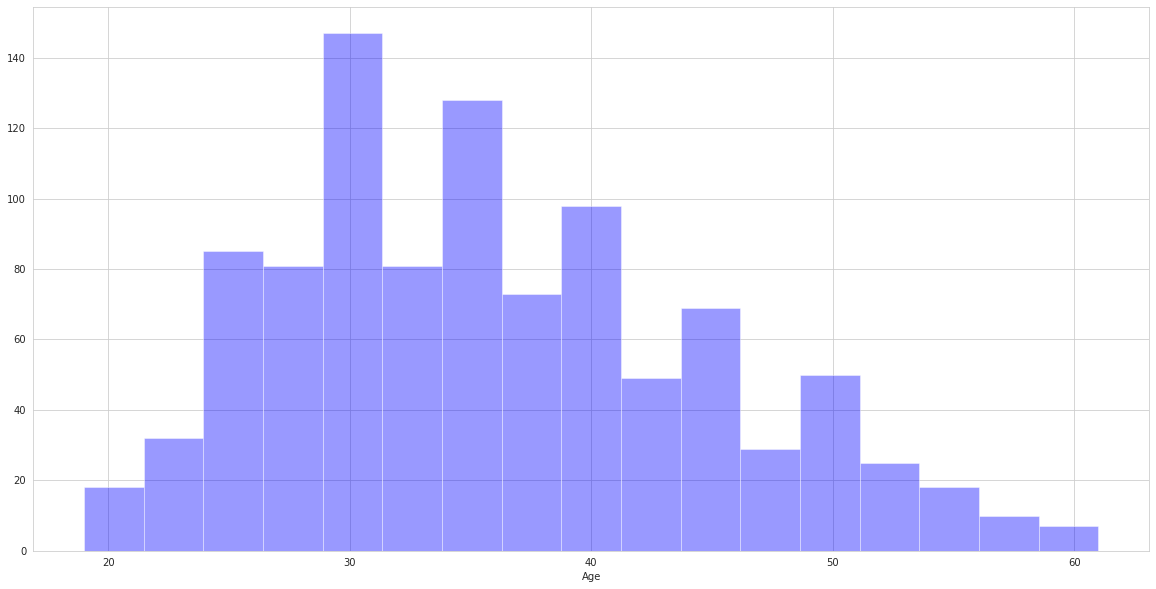

In [31]:
plt.figure(figsize=(20,10))
sns.distplot(df['Age'], kde=False, color = 'blue')

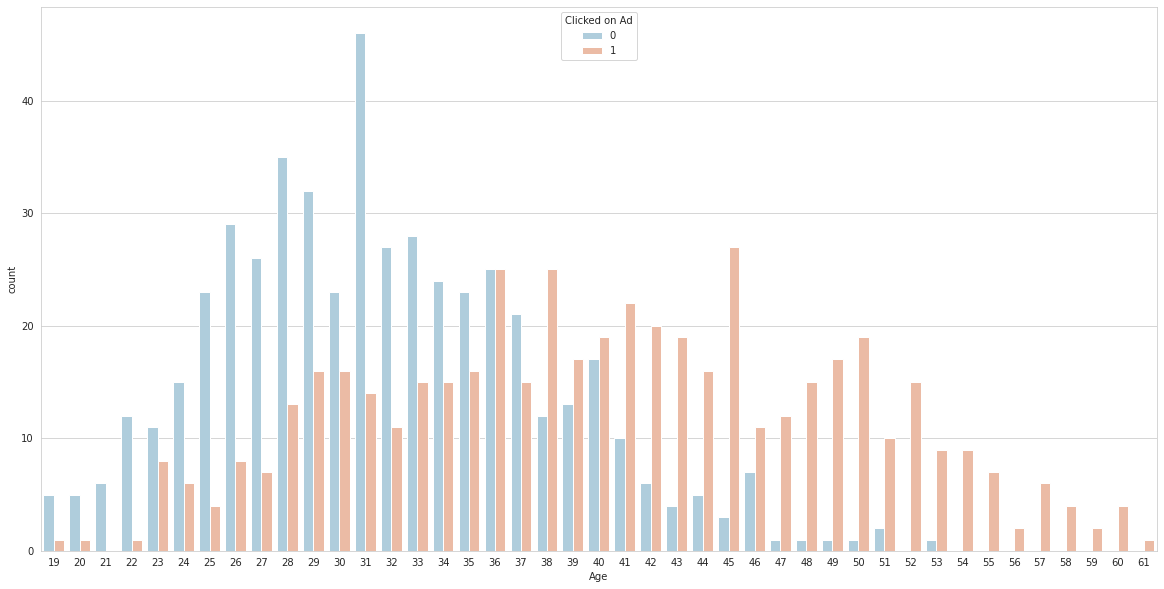

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age', hue = 'Clicked on Ad',data=df, palette='RdBu_r')

## 4. Data Wrangling

remove all non-numeric variable.

In [33]:
# remove Ad Topic Line, City, Country, and Timestamp
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [34]:
df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1,inplace=True)

In [35]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


# 5. Logistic Model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Clicked on Ad', axis=1), df['Clicked on Ad'], test_size=0.30, random_state=101)

In [38]:
from sklearn.linear_model import  LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = logmodel.predict(x_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

